In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./dataset/"))

['train2', 'valid2']


In [44]:
train_cat = "./dataset/train2/cats/"
train_dog = "./dataset/train2/dogs/"
valid_cat = "./dataset/valid2/cats/"
valid_dog = "./dataset/valid2/dogs/"
image_size = 400

In [7]:
# import os

# folder_path = valid_dog  # Specify the path to the folder containing the images

# # Get a list of all files in the folder
# file_list = os.listdir(folder_path)

# # Iterate over the files in the folder
# for file_name in file_list:
#     file_path = os.path.join(folder_path, file_name)
    
#     # Check the file extension
#     if not (file_name.lower().endswith(".png") or file_name.lower().endswith(".jpeg") or file_name.lower().endswith(".jpg")):
#         # Remove the file that doesn't have a PNG or JPEG extension
#         os.remove(file_path)
#         print(f"Removed file: {file_name}")

  0%|          | 0/368 [00:00<?, ?it/s]


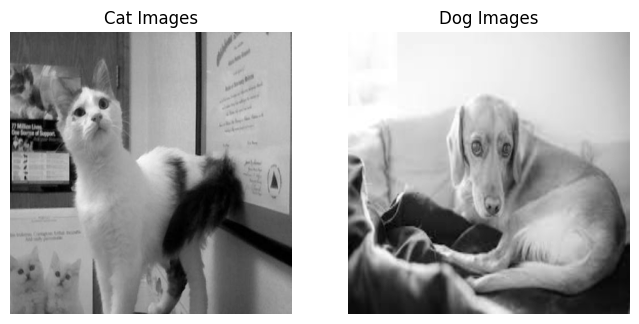

In [55]:
# Process cat images
for image in tqdm(os.listdir(train_cat)):
    path = os.path.join(train_cat, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size)).flatten()
        np_img = np.asarray(img)
        break  # Only process one image for demonstration purpose

# Process dog images
for image2 in tqdm(os.listdir(train_dog)):
    path = os.path.join(train_dog, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img2 is not None:
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        np_img2 = np.asarray(img2)
        break  # Only process one image for demonstration purpose

# Display the images
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
if 'np_img' in locals():
    plt.imshow(np_img.reshape(image_size, image_size), cmap='gray')
    plt.axis('off')
    plt.title('Cat Images')
else:
    plt.text(0.5, 0.5, 'No cat images found', ha='center', va='center', fontsize=12)
plt.subplot(1, 2, 2)
if 'np_img2' in locals():
    plt.imshow(np_img2.reshape(image_size, image_size), cmap='gray')
    plt.axis('off')
    plt.title('Dog Images')
else:
    plt.text(0.5, 0.5, 'No dog images found', ha='center', va='center', fontsize=12)

plt.show()

In [56]:
def train_data():
    train_data_cat = []
    train_data_dog = []
    
    for image1 in tqdm(os.listdir(train_cat)):
        path = os.path.join(train_cat, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img1 is not None:
            img1 = cv2.resize(img1, (image_size, image_size))
            img1 = np.expand_dims(img1, axis=-1)  # Expand dimensions to match the number of channels
            train_data_cat.append(img1)

    for image2 in tqdm(os.listdir(train_dog)):
        path = os.path.join(train_dog, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img2 is not None:
            img2 = cv2.resize(img2, (image_size, image_size))
            img2 = np.expand_dims(img2, axis=-1)  # Expand dimensions to match the number of channels
            train_data_dog.append(img2)

    # Check if all images have the same shape
    assert all(img.shape == train_data_cat[0].shape for img in train_data_cat), "Images in train_data_cat have different shapes"
    assert all(img.shape == train_data_dog[0].shape for img in train_data_dog), "Images in train_data_dog have different shapes"

    train_data = np.concatenate((np.asarray(train_data_cat), np.asarray(train_data_dog)), axis=0)

    return train_data

In [46]:
def test_data():
    test_data_cat = []
    test_data_dog = []
    
    for image1 in tqdm(os.listdir(valid_cat)):
        path = os.path.join(valid_cat, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img1 is not None:
            img1 = cv2.resize(img1, (image_size, image_size))
            img1 = np.expand_dims(img1, axis=-1)  # Expand dimensions to match the number of channels
        test_data_cat.append(img1)
    
    for image2 in tqdm(os.listdir(valid_dog)):
        path = os.path.join(valid_dog, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img2 is not None:
            img2 = cv2.resize(img2, (image_size, image_size))
            img2 = np.expand_dims(img2, axis=-1)  # Expand dimensions to match the number of channels
        test_data_dog.append(img2)
        
    test_data = np.concatenate((np.asarray(test_data_cat), np.asarray(test_data_dog)), axis=0)
    return test_data

In [57]:
train_data = train_data() 
# test_data = test_data()

100%|██████████| 368/368 [00:01<00:00, 293.47it/s]


In [29]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [30]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [61]:
y_data = np.concatenate((Y_train, Y_test), axis=0)
y_data = y_data.reshape(x_data.shape[0], 1)

ValueError: cannot reshape array of size 212 into shape (1090,1)

In [ ]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1090, 400, 400, 1)
Y shape:  (212,)
